In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def get_filepaths(folder_path: str):
    filepaths = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if os.path.isfile(filepath):
            filepaths.append(filepath)
    groups = {'centers_mem':[], 'centers_time':[], 'dimensions_mem':[], 'dimensions_time':[],
              'points_mem':[], 'points_time':[]}
    
    for filepath in filepaths:
        if 'mem' in filepath:
            if 'center' in filepath:
                groups['centers_mem'].append(filepath)
            elif 'dimension' in filepath:
                groups['dimensions_mem'].append(filepath)
            elif 'sample' in filepath:
                groups['points_mem'].append(filepath)
        elif 'time' in filepath:
            if 'center' in filepath:
                groups['centers_time'].append(filepath)
            elif 'dimension' in filepath:
                groups['dimensions_time'].append(filepath)
            elif 'sample' in filepath:
                groups['points_time'].append(filepath)
    
    return groups

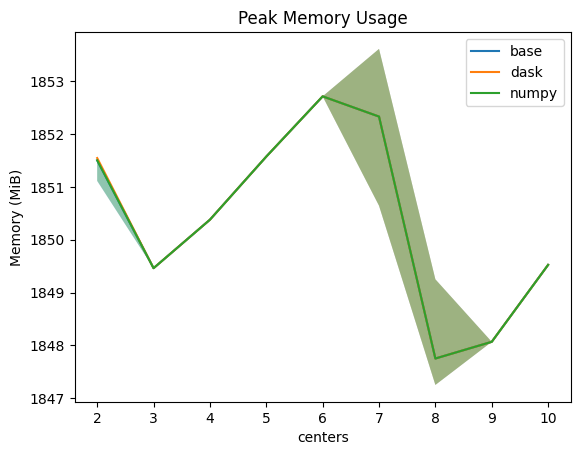

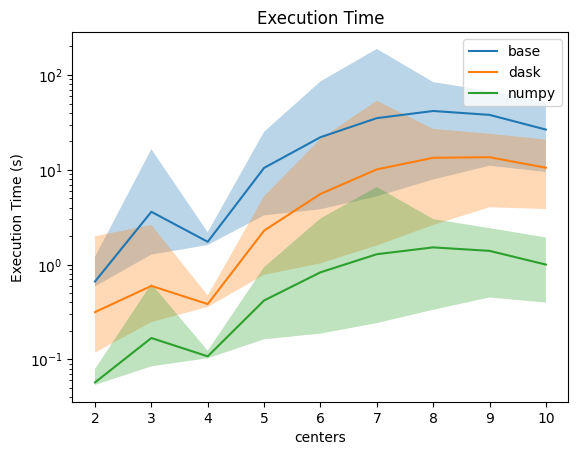

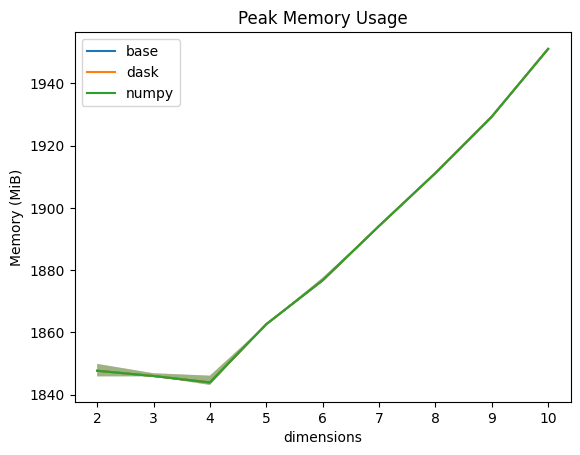

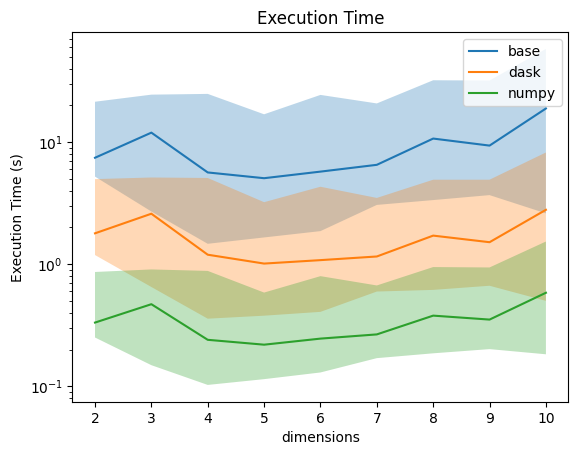

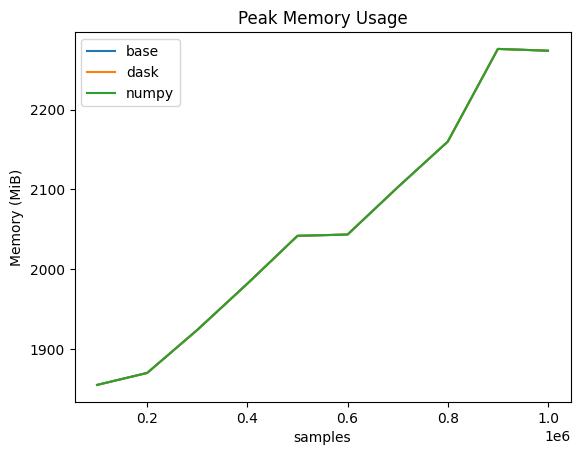

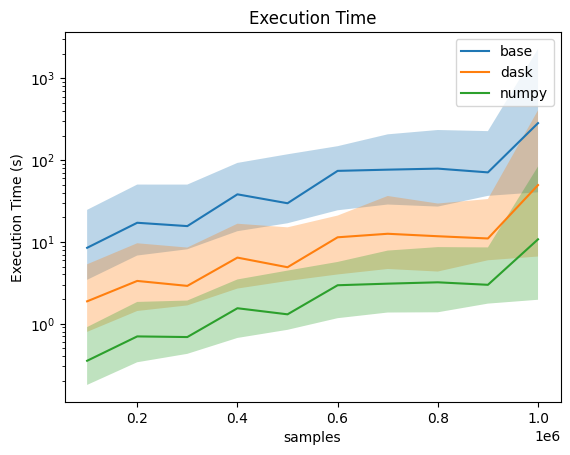

In [3]:
def plot_benchmarks(csv_files:list[str],measured_variable:str):
    fig, ax = plt.subplots()

    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        ax.plot(df['amount'], df['mean'], label=csv_file.split('_')[-1].split('.')[0])
        ax.fill_between(df['amount'], df['min'], df['max'], alpha=0.3)

    ax.set_xlabel(measured_variable+'s')
    if('mem' in csv_files[0]):
        ax.set_ylabel('Memory (MiB)')
        ax.set_title('Peak Memory Usage')
    else:
        ax.set_ylabel('Execution Time (s)')
        ax.set_title('Execution Time')
        plt.yscale("log")
    ax.legend()
    if('mem' in csv_files[0]):
        plt.savefig(f'../output/graphs/{measured_variable}_mem.png')
    else:
        plt.savefig(f'../output/graphs/{measured_variable}_time.png')

    plt.show()

if __name__ == "__main__":
    csv_files = get_filepaths('../output/output/')
    for group in csv_files.values():
        plot_benchmarks(sorted([el for el in group]),group[0].split('_')[-2])
